강남 3구의 체감 안전도가 높다는 기사 검증

실제 안전도가 정말 높은가?

서울시 구별 범죄 발생과 그 검거율을 지표로 사용

# 데이터 정리

In [1]:
import pandas as pd
import numpy as np

In [2]:
#pandas로 데이터 읽기

crime_anal_police = pd.read_csv("/content/02. crime_in_Seoul.csv",thousands=',',encoding='euc-kr')

crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


강남3구가 안전한지 확인하고 싶지만 데이터는 관서별로 되어있음

서울시에는 한 구에 하나, 두 군데의 경찰서가 있으며, 구 이름과 다른 경찰서도 존재

경찰서 이름으로 구 정보를 파악

In [3]:
station_address = ['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 남대문로5가 한강대로 410',
 '대한민국 서울특별시 서대문구 미근동 통일로 113',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 25',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 영등포구 당산동3가 2-11',
 '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진동 72',
 '대한민국 서울특별시 광진구 구의1동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 415-15',
 '대한민국 서울특별시 관악구 신림동 544',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배2동 방배천로 54',
 '대한민국 서울특별시 은평구 불광2동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [4]:
station_lat = [37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718401,
 37.538649,
 37.5897271,
 37.58506149999999,
 37.550814,
 37.5257884,
 37.5617309,
 37.5130685,
 37.542873,
 37.6128611,
 37.6373881,
 37.4814051,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4815453,
 37.6283597,
 37.6533589,
 37.49349]

In [5]:
station_lng = [126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9988562,
 126.966055,
 127.0161318,
 127.0457679,
 126.954028,
 126.901006,
 127.0363806,
 126.9428078,
 127.083821,
 126.9274951,
 127.0273238,
 126.9099508,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9829992,
 126.9287226,
 127.052682,
 127.0772119]

In [6]:
# 주소로부터 구별 이름으로 바꾸기

gu_name = []

for name in station_address:
    
    tmp = name.split()

    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]

    gu_name.append(tmp_gu)

crime_anal_police['구별'] = gu_name

crime_anal_police.head()


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [7]:
#금천경찰서는 관악구에 위치해 있는데 금천구로 이전할 계획이라 예외처리

crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


In [8]:
crime_anal_police.loc[crime_anal_police['관서명']=='금천서',['구별']] = '금천구'

crime_anal_police[crime_anal_police['관서명'] == '금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [9]:
# 혹시 모를 실수를 위해 데이터 저장

crime_anal_police.to_csv('crime_in_seoul_include_gu_name.csv',sep=',',encoding='utf-8')

In [10]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


같은 구에 경찰서가 2개인 경우, 즉 2개의 관서명이 동일한 구를 가지는 경우 어떻게 처리?

# pivot table을 이용해서 정리하기

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_excel('/content/02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [13]:
#name 컬럼으로 정렬

#index를 name으로 지정
#기본값은 숫자형 데이터만 남고, 중복된 name은 제거되며 value가 평균값으로 나타남

pd.pivot_table(df,index=['Name'])

#name으로 그룹화 시키는 느낌?

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [14]:
#index에는 여러개 지정 가능함

pd.pivot_table(df,index=['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [15]:
#특정한 value만 지정가능

pd.pivot_table(df,index=['Manager','Rep'],values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [16]:
#value는 기본값이 평균이 되는데, 합계를 사용하고 싶다면
#aggfunc=np.sum

pd.pivot_table(df,index=['Manager','Rep'],values=['Price'],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [17]:
##index로 중심이 되는 열과 value로 보고 싶은 수치
##aggfunc로 합계나 평균 등등 구하고 싶은 값으로
##fill_value는 NaN에 채울 값

pd.pivot_table(df,index=['Manager','Rep','Product'],
               values=['Price','Quantity'],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

pivot table을 잘 활용하면 유용하게 수치를 정리할 수도 있다

pivot table이 생각이 안나면 여러 반복문과 조건문으로 처리하려다 보니 머리 아플 수 있음

In [18]:
crime_anal_raw = pd.read_csv('/content/02. crime_in_Seoul_include_gu_name.csv',encoding='utf-8')

crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [19]:
#pivot table로 관서별에서 구별로 정리

crime_anal_raw = pd.read_csv('/content/02. crime_in_Seoul_include_gu_name.csv',encoding='utf-8',index_col=0)

##'구별'을 index로 하고 나머지 수치 컬럼을 합계로 표시하는

crime_anal = pd.pivot_table(crime_anal_raw,index='구별', aggfunc=np.sum)

crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [20]:
#검거율 계산

crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

#검거 수치는 검거율로 대체하고 삭제함

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [21]:
##검거율이 100이 넘는 수치도 존재하는데, 여러 연도에 발생한 건수가 포함되어서 발생 건수보다 커져서 그런듯?

##100이 넘는 수치는 그냥 100으로 처리

con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for column in con_list:
    
    crime_anal.loc[crime_anal[column]>100, column] = 100

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [22]:
##컬럼에서 "발생"이라는 단어는 삭제

crime_anal.rename(columns ={'강간 발생':'강간','강도 발생':'강도', '살인 발생':'살인', '절도 발생':'절도',
                            '폭력 발생':'폭력'},inplace=True)

#서울시 구별 5대 범죄의 발생건수와 검거율
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


# 정규화

컬럼의 데이터 범위를 비슷하게 놓게 비교하는 것이 편리할 때가 있다

In [23]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도','폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler() ##scaler 만들기

x_scaled = min_max_scaler.fit_transform(x.astype(float))  ##x를 scaler에 fitting시키기

crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index) ##fitting된 것을 dataframe으로 생성하면 된다


##col2의 데이터를 새로만든 데이터프레임에 집어넣기

col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_anal_norm[col2] = crime_anal[col2]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [24]:
##cctv 데이터 읽기

result_CCTV = pd.read_csv('/content/01. CCTV_result.csv',encoding='UTF-8',index_col='구별')

##cctv 데이터를 가져와 붙이기
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


정규화하지 않고 단순히 합해버리면.. 어떤 컬럼의 데이터 비중이 매우 클때, 매우 작은 데이터 비중을 가진 데이터가 영향력이 없어

그래서 정규화하고 합한다면, 그런 영향력을 비슷하게 취급하고 더해주니 의미가 생김

In [25]:
##범죄 발생건수들을 "범죄"로 통합

col = ['강간','살인','강도','절도','폭력']

crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [26]:
#검거율도 하나로 통합

col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

crime_anal_norm['검거'] = np.sum(crime_anal_norm[col],axis=1)

crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


# 범죄 데이터 시각화

In [27]:
#한글 글꼴 설치
#런타임 재시작 필수

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [28]:
#한글 글꼴 세팅

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


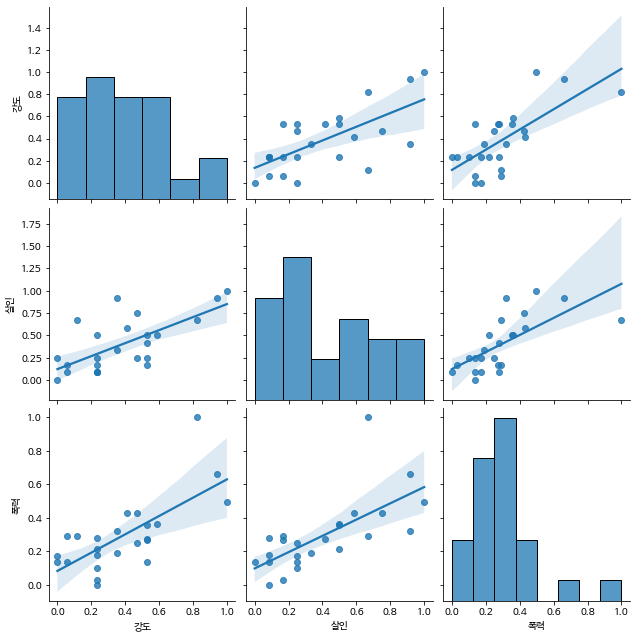

In [29]:
#강도, 살인, 폭력의 상관관계
#모두 양의 상관관계

sns.pairplot(crime_anal_norm, vars = ['강도','살인','폭력'], kind = 'reg', size=3)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


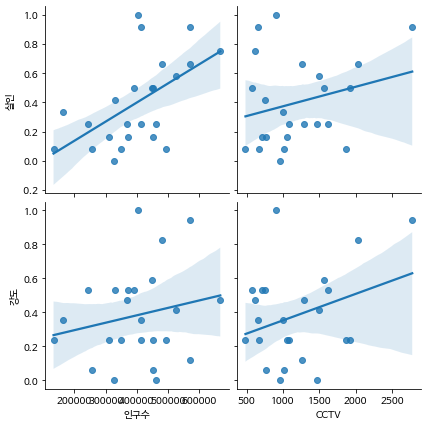

In [30]:
#인구수,cctv, 살인,강도 사이 상관관계

##cctv수가 적을때, 살인 강도가 많이 일어나는 경우가 존재함

sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인','강도'], kind='reg',size=3)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


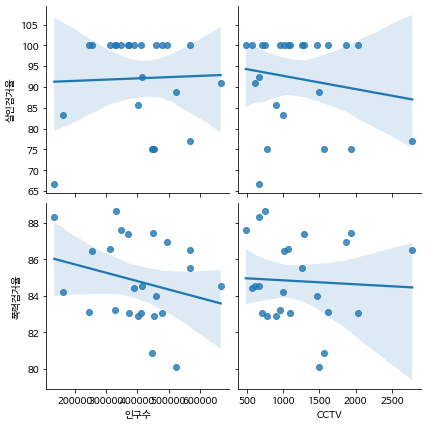

In [31]:
#인구수, cctv수와 살인검거율,폭력검거율 사이 상관관계

#살인검거율,폭력검거율과 인구수, cctv사이 관계는 양의 상관관계가 아니다

##cctv가 많다고 살인,폭력 검거율이 높진 않다
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인검거율','폭력검거율'], kind='reg', size=3)

plt.show()

In [32]:
tmp_max = crime_anal_norm['검거'].max()

crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max*100

##검거를 기준으로 내림차순 정렬

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)

crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


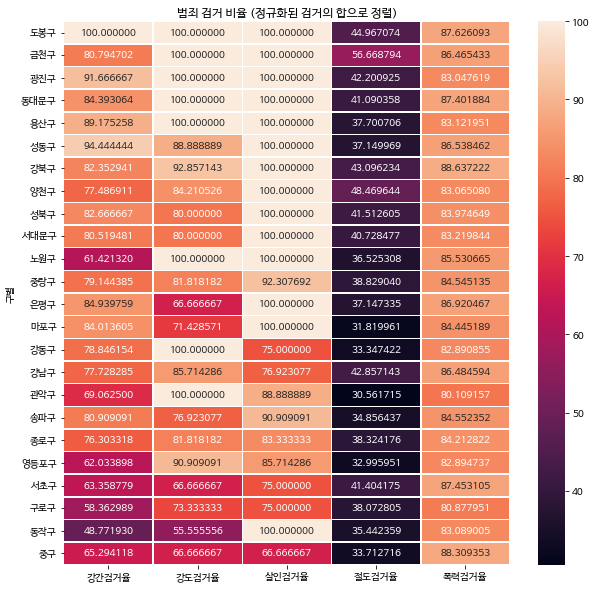

In [33]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거',ascending=False)

plt.figure(figsize=(10,10))


##절도검거율은 다른 검거율에 비해 낮다

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths =.5)

plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')

plt.show()

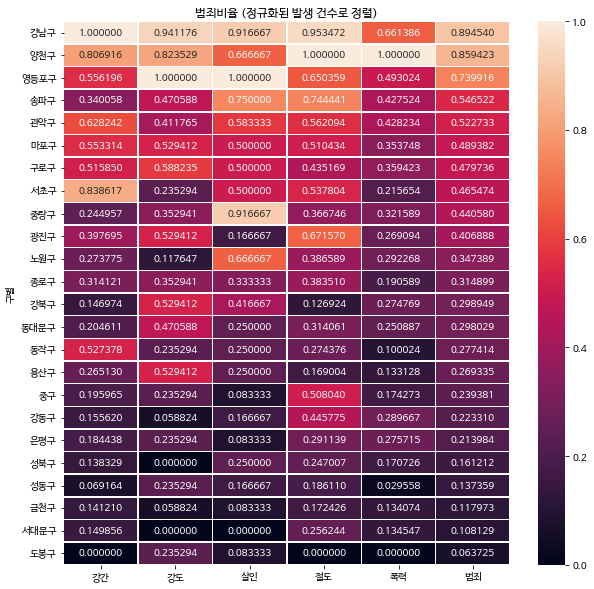

In [34]:
target_col = ['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5

crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))

#강남3구는 범죄 발생건수가 낮다고 볼수는 없다

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)

plt.title('범죄비율 (정규화된 발생 건수로 정렬)')

plt.show()

In [35]:
##혹시 모르니 저장

crime_anal_norm.to_csv('crime_in_seoul_final.csv',sep=',',encoding='utf-8')

# Folium을 이용한 시각화

In [36]:
import folium

In [37]:
#안보일경우 크롬 브라우저 이용 권장

#위경도만 주면, 반응형 맵을 제공
map_osm = folium.Map(location=[45.5236,-122.6750])
map_osm

In [38]:
#zoom_start는 확대 비율 정의..? 비슷한것 같긴한디

stamen = folium.Map(location=[45.5236,-122.6750], zoom_start=13)

stamen

In [39]:
#tiles 옵션으로 지도 모양 변경

stamen = folium.Map(location=[45.5236,-122.6750], tiles="Stamen Toner", zoom_start=13)

stamen

In [40]:
stamen = folium.Map(location=[45.5236,-122.6750], tiles="Stamen Terrain")
stamen

In [41]:
#지도를 그리고 원하는 좌표에 Marker로 표시 가능

map_1 = folium.Map(location=[45.372,-121.6972],zoom_start=12,
                   tiles="Stamen Terrain")

folium.Marker([45.3288,-121.6625],popup="Mt. Hood Meadows",
              icon=folium.Icon(icon='cloud')).add_to(map_1)

folium.Marker([45.3311,-121.7113], popup = 'Timberline Lodge',
              icon=folium.Icon(icon='cloud')).add_to(map_1)

map_1

In [42]:
map_1 = folium.Map(location=[45.372,-121.6972],
                   zoom_start=12, tiles="Stamen Terrain")

folium.Marker([45.3288,-121.6625], popup="Mt.Hood Meadows",
              icon=folium.Icon(icon='cloud')).add_to(map_1)

folium.Marker([45.3311,-121.7113], popup="Timberline Lodge",
              icon=folium.Icon(icon = 'green')).add_to(map_1)

folium.Marker([45.3300,-121.6823], popup="Some other location",
              icon = folium.Icon(color='red',icon='info-sign')).add_to(map_1)

map_1

In [43]:
#circlemarker는 반경과 색상을 지정해서 원을 그려줌
#popup은 클릭하면 나올 텍스트

map_2 = folium.Map(location=[45.5236,-122.6750],tiles="Stamen Toner",
                   zoom_start=13)

folium.Marker([45.5244,-122.6699], popup="The Waterfront").add_to(map_2)

folium.CircleMarker([45.5215,-122.6261],radius=50,
                    popup="Laurelhurst Park", color="#3186cc",
                    fill_color="#3186cc").add_to(map_2)

map_2

In [44]:
#number_of_sides에서 지정한 수로 사각형, 삼각형,오각형,...

map_5 = folium.Map(location=[45.5236,-122.6750], zoom_start=13)

folium.RegularPolygonMarker([45.5012,-122.6655],
                            popup="Ross Island Bridge",fill_color="#132b5e",
                            number_of_sides=3,radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5132,-122.6708],
                            popup="Hawthorne Bridge",fill_color="#45647d",
                            number_of_sides=4,radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5275,-122.6692],
                            popup="Steel Bridge",fill_color="#769d96",
                            number_of_sides=6,radius=10).add_to(map_5)

folium.RegularPolygonMarker([45.5318,-122.6745],
                            popup="Broadway Bridge",fill_color="#769d96",
                            number_of_sides=8,radius=10).add_to(map_5)

map_5

## 지도에 실업률 표시

In [45]:
import folium
import pandas as pd

In [46]:
#2012년 10월 기준 미국 주별 실업률

state_unemployment = "/content/02. folium_US_Unemployment_Oct2012.csv"

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [47]:
#지도 고유 id 주별 좌표 등등 데이터

state_geo = "/content/02. folium_us-states.json"

map = folium.Map(location=[40,-98], zoom_start=4)

map.choropleth(geo_data=state_geo, data=state_data,
               columns=['State','Unemployment'],
               key_on = 'feature.id',
               fill_color='YlGn',
               legend_name='Unemployment Rate (%)')

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# folium을 이용한 범죄율 시각화

In [48]:
#서울시 구별 위치를 나타내는 데이터

import json
geo_path = '/content/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [50]:
#살인 발생 건수 시각화

map = folium.Map(location=[37.5502,126.982], zoom_start=11,
                 tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['살인'],
               columns = [crime_anal_norm.index,crime_anal_norm['살인']],
               fill_color='PuRd',
               key_on='feature.id')

map

In [51]:
#강간 발생 건수를 이용한 시각화

map = folium.Map(location=[37.5502,126.982],zoom_start=11,
                 tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['강간'],
               columns=[crime_anal_norm.index,crime_anal_norm['강간']],
               fill_color='PuRd',
               key_on='feature.id')

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [52]:
#범죄 건수 시각화

map = folium.Map(location=[37.5502,126.982],zoom_start=11,
                 tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color='PuRd',
               key_on='feature.id')

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [54]:
#검거 건수 시각화

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['검거'],
               columns = [crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [53]:
#강남3구 주변이 범죄 발생 건수가 높은데, 인구 대비 범죄 발생 비율 시각화

tmp_criminal = crime_anal_norm['범죄']/crime_anal_norm['인구수']*1000000

map = folium.Map(location=[37.5502,126.982],zoom_start=11,
                 tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
               data=tmp_criminal,
               columns=[crime_anal.index,tmp_criminal],
               fill_color='YlGnBu',
               key_on='feature.id')

map
#중구와 종로구의 범죄율이 매우 높은데, 거주 인구가 적으면서 관광지여서 높게 나타날 가능성

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 경찰서별 검거율과 범죄 발생율 동시에 표현

In [55]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거','강도 검거','강간 검거','절도 검거','폭력 검거']
tmp = crime_anal_raw[col]/crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp,axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571840,126.998856,1.198382


In [56]:
#경찰서별 위치

map = folium.Map(location=[37.5502,126.982],zoom_start=11)

for n in crime_anal_raw.index:
    
    folium.Marker([crime_anal_raw['lat'][n],
                   crime_anal_raw['lng'][n]],
                  popup='{}'.format(crime_anal_raw['관서명'][n])).add_to(map)

map

In [57]:
#경찰서별 검거에 적당한 값을 곱해 검거율을 원의 넓이로 표현
#원이 클수록 검거율이 높다

map = folium.Map(location=[37.5502,126.982], zoom_start=11)

for n in crime_anal_raw.index:
    
    folium.CircleMarker([crime_anal_raw['lat'][n],crime_anal_raw['lng'][n]],
                        popup='{}'.format(crime_anal_raw['관서명'][n]),
                        radius = crime_anal_raw['검거'][n]*10,
                        color='#3186cc',fill_color='#3186cc').add_to(map)
map

In [58]:
#범죄 발생 건수와 경찰서별 검거율을 같이 표현

map = folium.Map(location=[37.5502,126.982],zoom_start=11)

map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['범죄'],
               columns=[crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color='PuRd',
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]],
                        popup = '{}'.format(crime_anal_raw['관서명'][n]),
                        radius = crime_anal_raw['검거'][n]*10,
                        color = '#3186cc',fill_color='#3186cc').add_to(map)

map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
